# Neural Networks Beginner Practice

Usando randomización para identificar numeros escritos a mano

In [125]:
import numpy as np
import matplotlib.pyplot as plt


In [126]:
class NeuralNetwork:
    def __init__(self, layer_sizes):
        weight_shapes = [(a,b) for a,b in zip(layer_sizes[1:],layer_sizes[:-1])]
        self.weights = [np.random.standard_normal(s)/s[1]**.5 for s in weight_shapes]
        self.biases = [np.zeros((s,1)) for s in layer_sizes[1:]] 
    
    def predict(self,a):
        for w,b in zip(self.weights,self.biases):
            a = self.activation(np.matmul(w,a)+b)
        return a
    
    def print_accuracy(self, images,labels):
        predictions = self.predict(images)
        num_correct = sum([np.argmax(a) == np.argmax(b) for a,b in zip(predictions,labels)])
        print('{0}/{1} accuracy: {2}%'.format(num_correct,len(images),(num_correct/len(images))*100))
    
    @staticmethod
    def activation(x):
        return 1/(1+np.exp(-x))

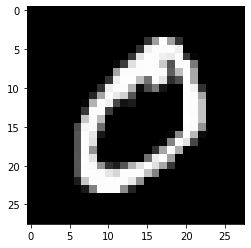

In [127]:


with np.load('mnist.npz') as data:
    training_images = data['training_images']
    training_labels = data['training_labels']

plt.imshow(training_images[1].reshape(28,28),cmap = 'gray')
plt.show()


In [128]:
layer_sizes = (784,5,10)

net = NeuralNetwork(layer_sizes)
prediction = net.print_accuracy(training_images,training_labels)


4940/50000 accuracy: 9.879999999999999%


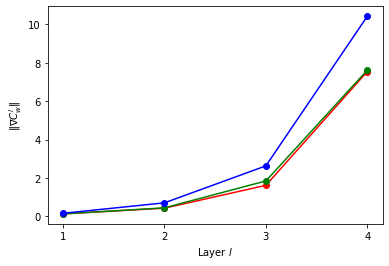

In [129]:
nw1 = [0.129173436407863, 0.4242933114455002, 
       1.6154682713449411, 7.5451567587160069]
nw2 = [0.12571016850457151, 0.44231149185805047, 
       1.8435833504677326, 7.61973813981073]
nw3 = [0.15854489503205446, 0.70244235144444678, 
       2.6294803575724157, 10.427062019753425]
plt.plot(range(1, 5), nw1, "ro-", range(1, 5), nw2, "go-", 
         range(1, 5), nw3, "bo-")
plt.xlabel('Layer $l$')
plt.ylabel(r"$\Vert\nabla C^l_w\Vert$")
plt.xticks([1, 2, 3, 4])
plt.show()